In [6]:
import numpy as np
import pandas as pd
import requests
import io

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
decades = ["1950", "1960", "1970", "1980", "1990", "2000", "2010"]
decades_data = {}

for i in decades: 
  url = "https://raw.githubusercontent.com/veenaramesh/music_genres/main/data/" + str(i)+ ".csv"
  decades_data[i] = pd.read_csv(url)

In [18]:
decades_data["1950"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Number     73 non-null     int64 
 1   title      73 non-null     object
 2   artist     73 non-null     object
 3   top genre  61 non-null     object
 4   year       73 non-null     int64 
 5   bpm        73 non-null     int64 
 6   nrgy       73 non-null     int64 
 7   dnce       73 non-null     int64 
 8   dB         73 non-null     int64 
 9   live       73 non-null     int64 
 10  val        73 non-null     int64 
 11  dur        73 non-null     int64 
 12  acous      73 non-null     int64 
 13  spch       73 non-null     int64 
 14  pop        73 non-null     int64 
dtypes: int64(12), object(3)
memory usage: 8.7+ KB


In [19]:
decades_data["1950"].describe()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,37.000000,1994.205479,111.150685,34.890411,51.027397,-11.616438,18.150685,57.589041,149.534247,73.013699,4.191781,40.863014
std,21.217131,21.570916,28.046425,17.411332,14.502847,3.426328,12.005405,25.086980,22.517945,20.130472,1.807834,10.355239
min,1.000000,1945.000000,72.000000,6.000000,18.000000,-18.000000,2.000000,10.000000,98.000000,4.000000,3.000000,26.000000
25%,19.000000,1984.000000,87.000000,21.000000,41.000000,-15.000000,10.000000,36.000000,135.000000,63.000000,3.000000,33.000000
50%,37.000000,2000.000000,108.000000,33.000000,52.000000,-10.000000,13.000000,57.000000,148.000000,79.000000,3.000000,39.000000
75%,55.000000,2011.000000,128.000000,44.000000,59.000000,-9.000000,24.000000,79.000000,163.000000,87.000000,4.000000,48.000000
max,73.000000,2019.000000,195.000000,97.000000,88.000000,-2.000000,72.000000,99.000000,214.000000,100.000000,11.000000,72.000000


In [21]:
for i in decades: 
  decades_data[i].set_index("Number", inplace=True)
  decades_data[i].drop(['year'], axis=1, inplace=True)

In [22]:
decades_data['1950'].head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,,,,,,,,,,,,,
1,Put Your Head On My Shoulder,Paul Anka,adult standards,116,34,55,-9,10,47,155,75,3,72
2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,177,34,42,-11,72,78,123,86,4,62
3,Everybody Loves Somebody,Dean Martin,adult standards,81,49,26,-9,34,40,162,81,4,61
4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,82,43,49,-12,12,66,151,70,6,60
5,A Teenager In Love,Dion & The Belmonts,adult standards,79,38,56,-9,13,62,158,67,3,60


In [29]:
for i in decades: 
  print("Missing values from ", i)
  print(decades_data[i].isna().sum())
  decades_data[i].dropna(how='any', inplace=True)

Missing values from  1950
title         0
artist        0
top genre    12
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64
Missing values from  1960
title        0
artist       0
top genre    0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64
Missing values from  1970
title        0
artist       0
top genre    0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64
Missing values from  1980
title        0
artist       0
top genre    1
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64
Missing values from  1990
title        0
artist    

In [30]:
decades_data['1950'].columns

Index(['title', 'artist', 'top genre', 'bpm', 'nrgy', 'dnce', 'dB', 'live',
       'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [47]:
columns = list(decades_data['1950'].columns)
len(columns)

14

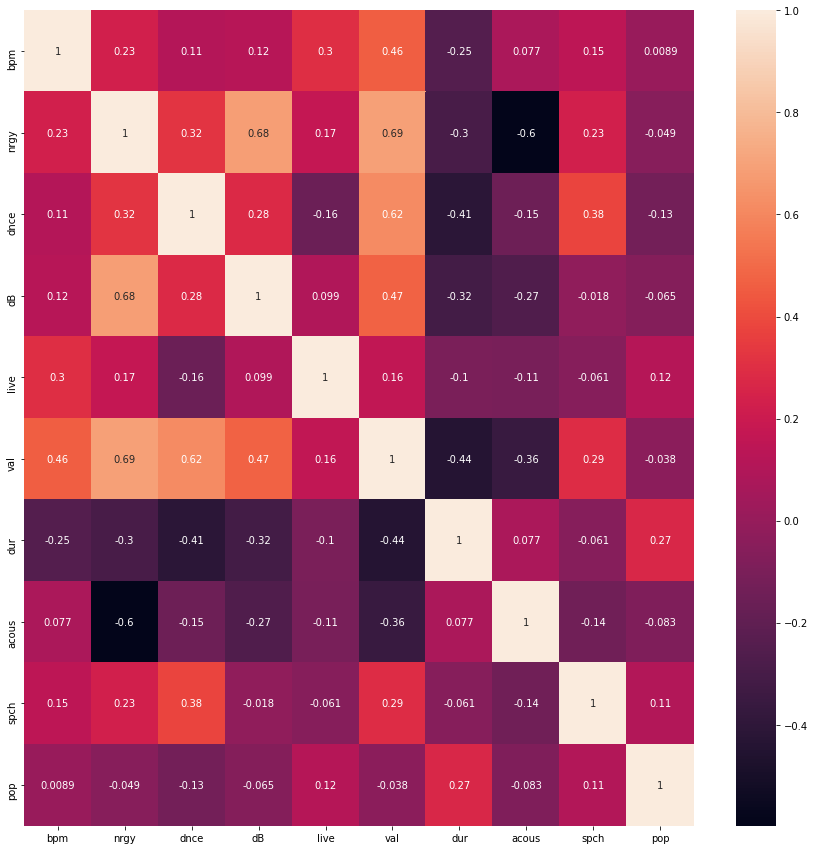

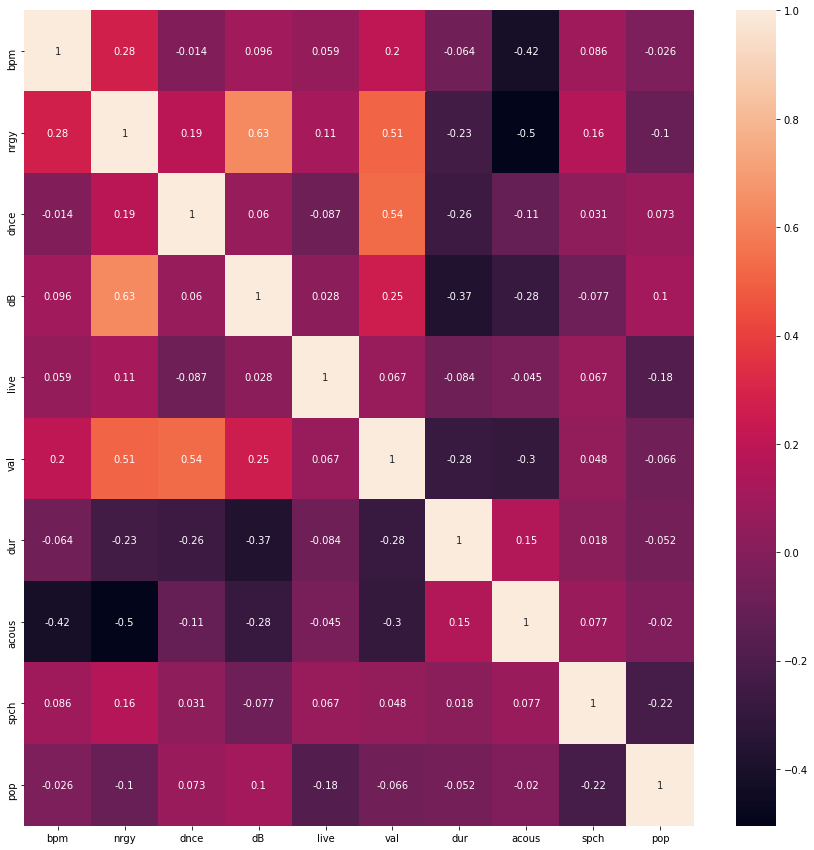

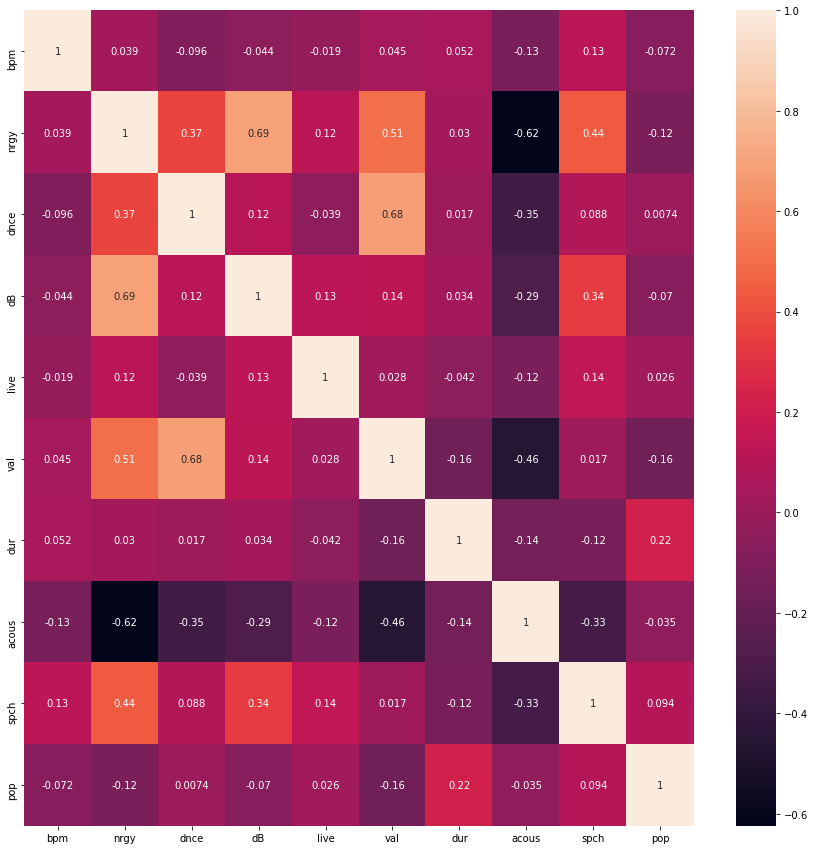

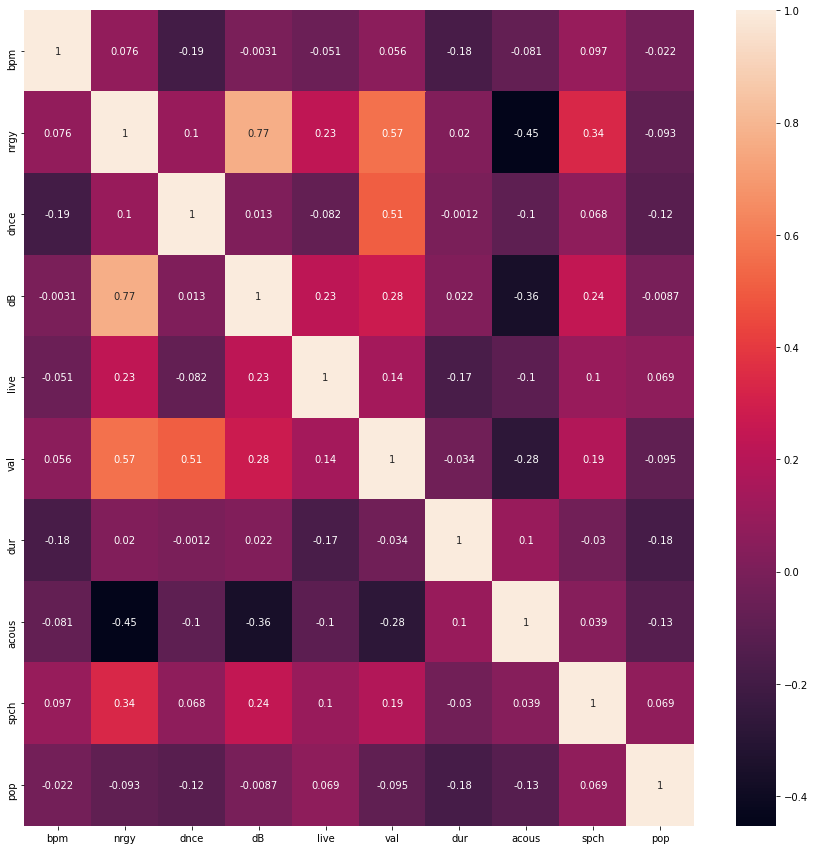

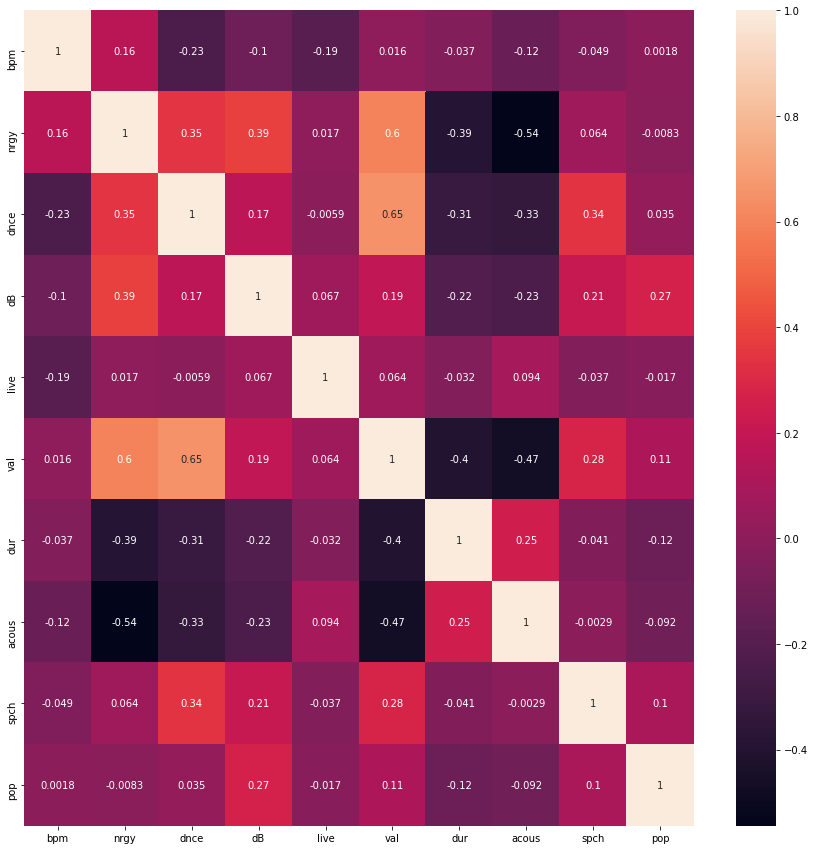

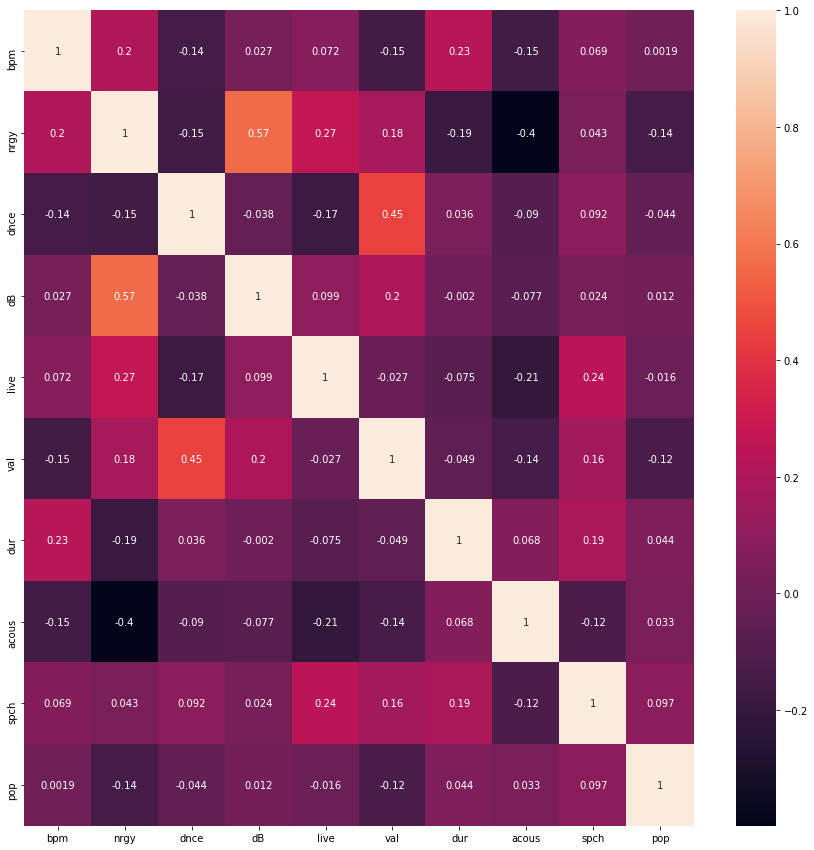

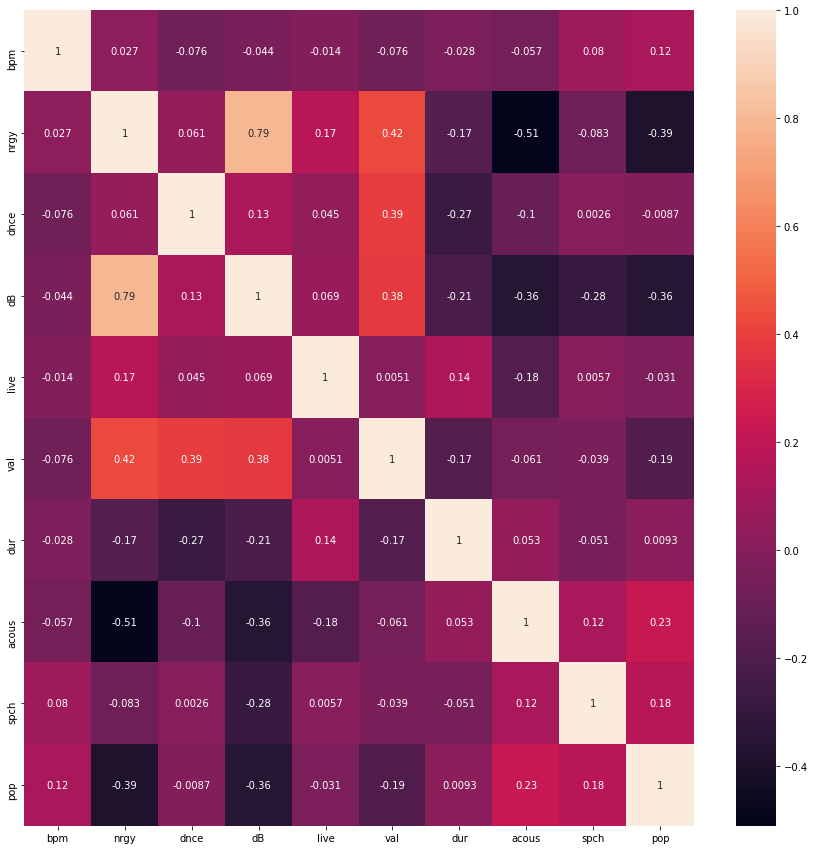

In [32]:
for i in decades: 
  plt.figure(figsize=(15, 15))
  sns.heatmap(decades_data[i].corr(), annot=True)
  plt.savefig('heatmap_'+i+'.png')

In [40]:

for i in decades: 
  decades_data[i]['year'] = i

all_decades_data = pd.concat(decades_data.values(), ignore_index=True)
all_decades_data.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,year
0,Put Your Head On My Shoulder,Paul Anka,adult standards,116,34,55,-9,10,47,155,75,3,72,1950
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,177,34,42,-11,72,78,123,86,4,62,1950
2,Everybody Loves Somebody,Dean Martin,adult standards,81,49,26,-9,34,40,162,81,4,61,1950
3,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,82,43,49,-12,12,66,151,70,6,60,1950
4,A Teenager In Love,Dion & The Belmonts,adult standards,79,38,56,-9,13,62,158,67,3,60,1950


In [57]:
columnsint = columns[3:]
columnsint = columnsint[:-1]
columnsint

['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

In [41]:
all_decades_data.tail()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,year
646,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,90,80,65,-3,27,80,211,3,10,56,2010
647,Dynamite,Taio Cruz,dance pop,120,79,76,-4,3,87,203,0,8,56,2010
648,Break Your Heart,Taio Cruz,dance pop,122,89,67,-5,24,68,185,0,3,54,2010
649,Summer Air,ItaloBrothers,dance pop,102,75,76,-4,8,49,184,6,7,43,2010
650,All I Wanna Do,Martin Jensen,big room,112,79,73,-4,7,56,194,16,7,32,2010


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

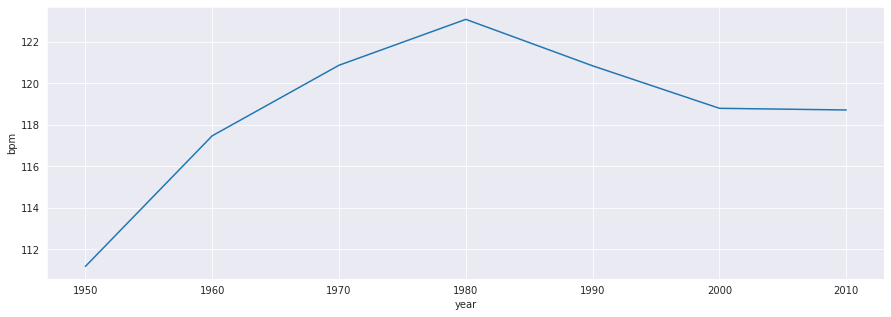

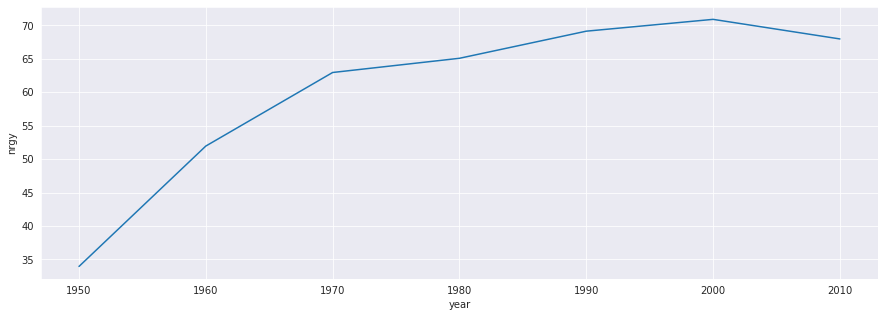

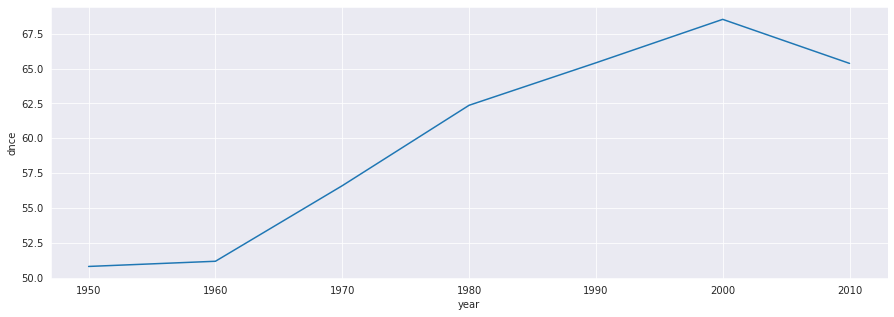

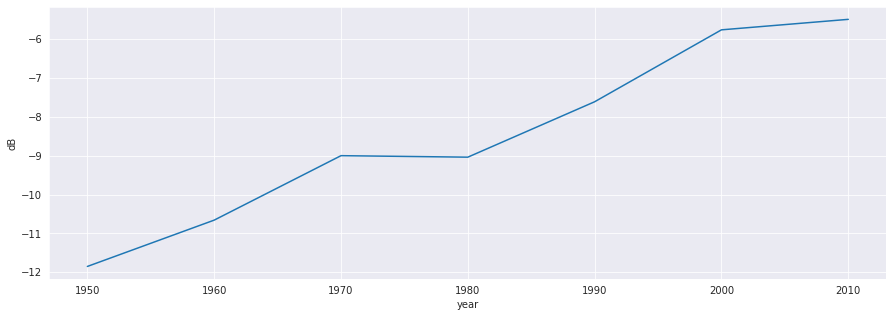

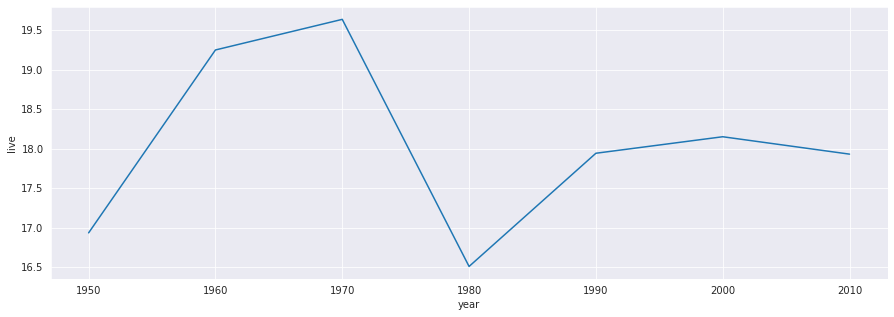

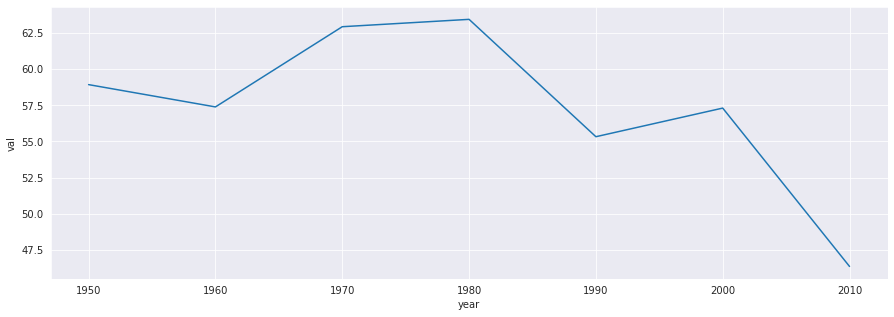

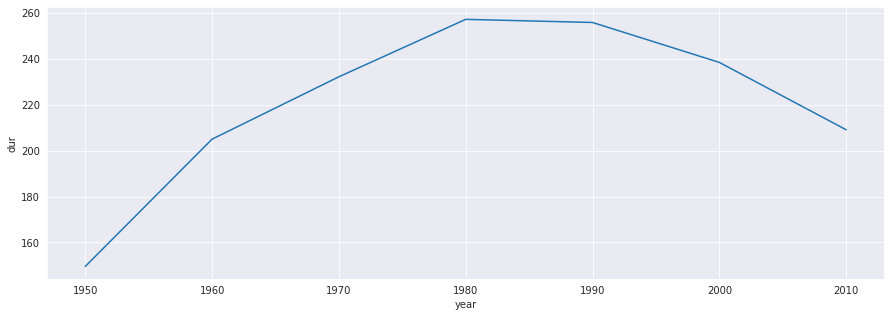

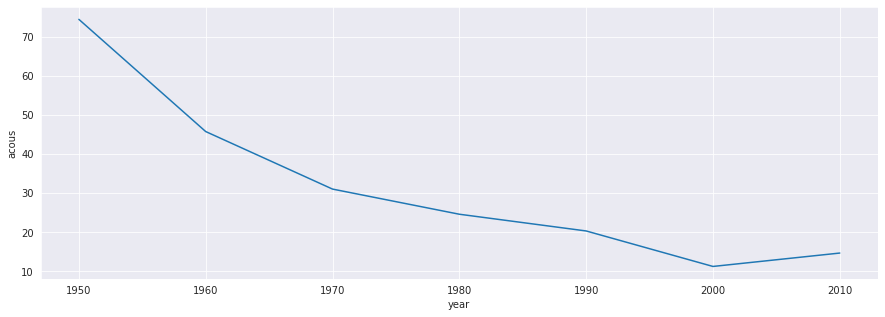

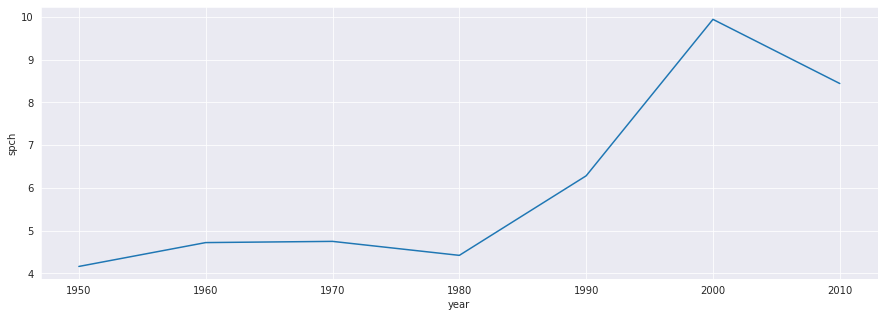

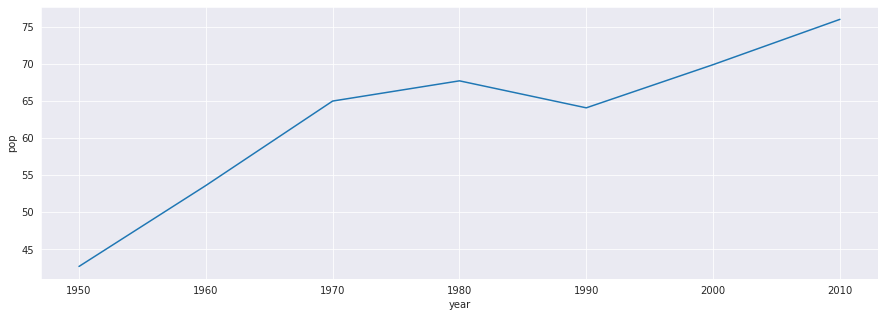

In [59]:
for c in columnsint: 
  y = all_decades_data.groupby('year')[c].mean()
  x = y.index
  plt.figure(figsize=(15, 5))
  sns.set_style('darkgrid')
  sns.lineplot(x, y)
  plt.savefig("time_series_trends_"+c+'.png')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

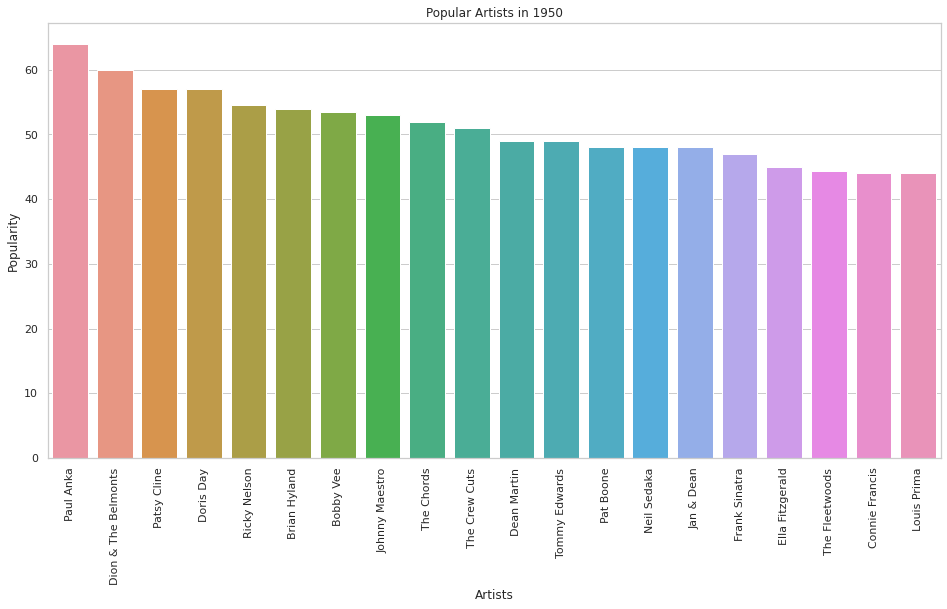

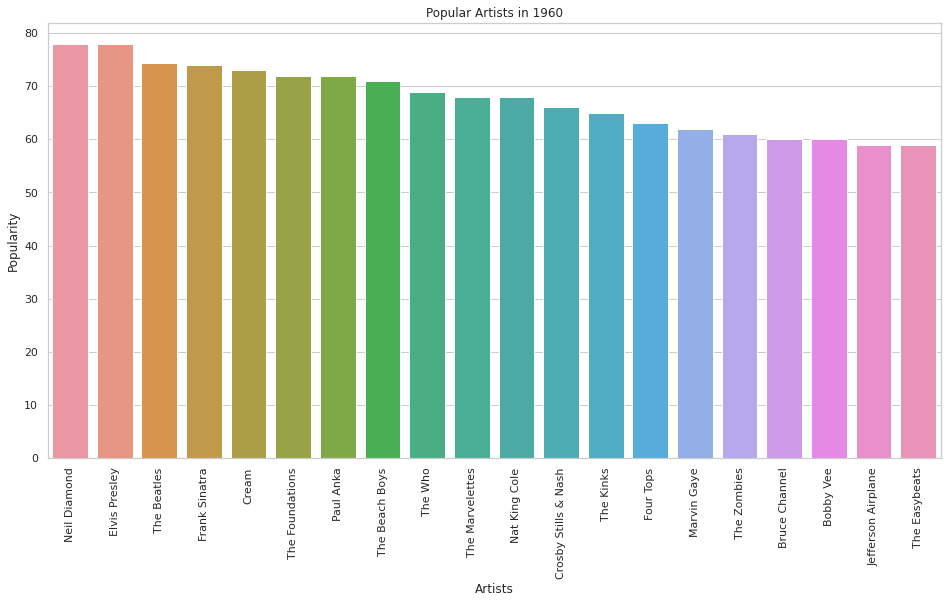

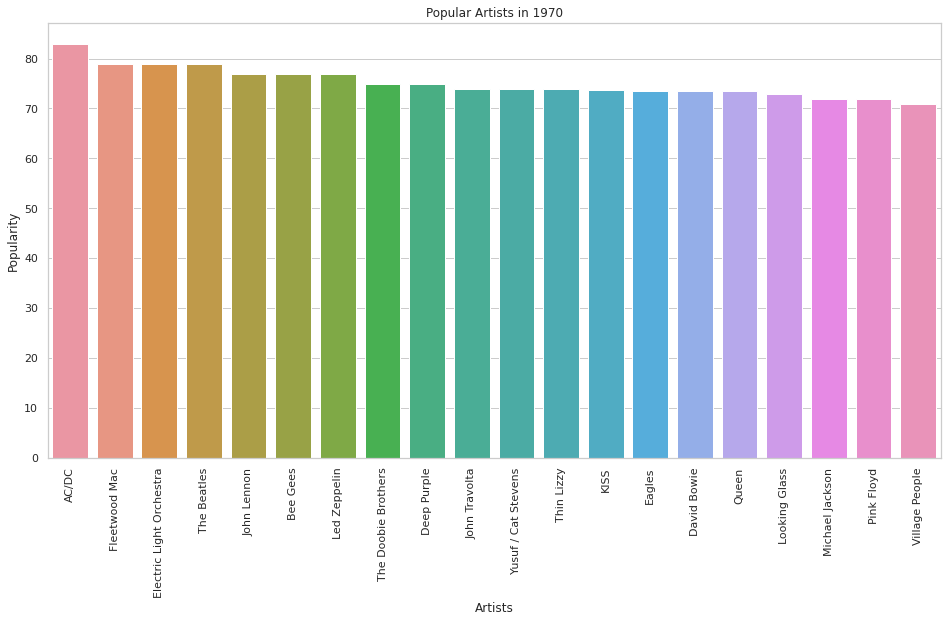

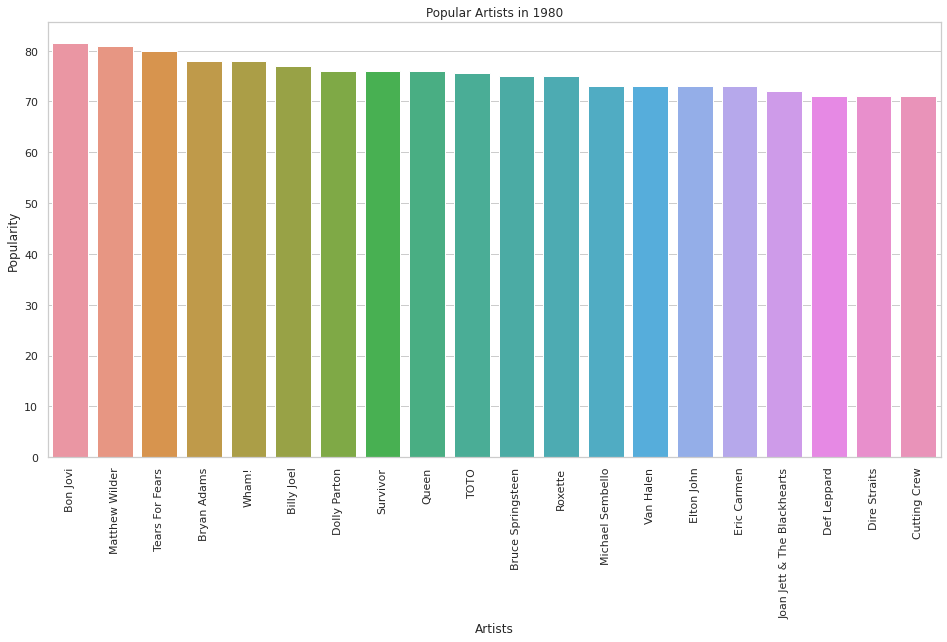

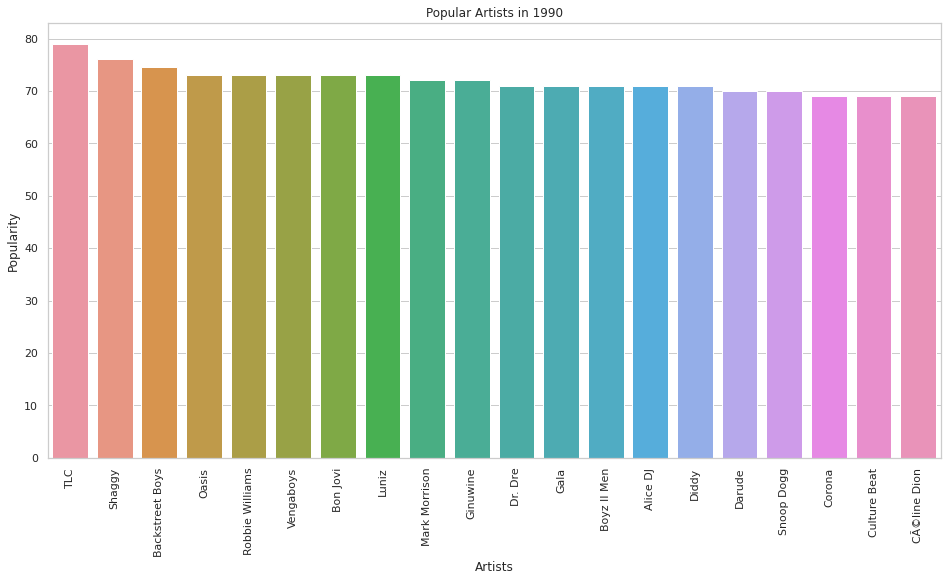

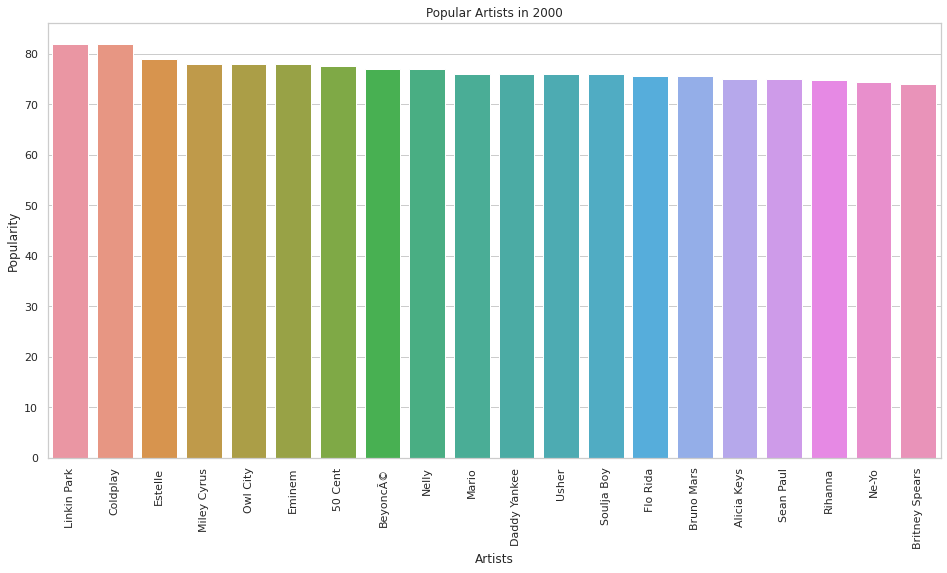

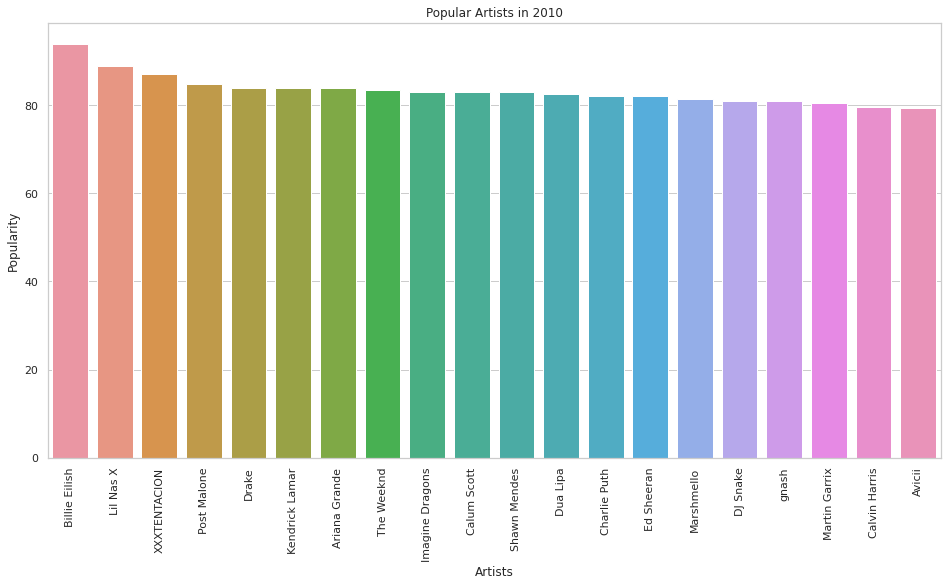

In [61]:
for i in decades: 
  plt.figure(figsize=(16, 8))
  sns.set(style='whitegrid')
  x = decades_data[i].groupby('artist')['pop'].mean().sort_values(ascending=False).head(20)
  ax = sns.barplot(x.index, x)
  ax.set_title('Popular Artists in ' + i)
  ax.set_ylabel('Popularity')
  ax.set_xlabel('Artists')
  plt.xticks(rotation=90)
  plt.savefig('popular_artists_'+i)

In [62]:
columns

['title',
 'artist',
 'top genre',
 'bpm',
 'nrgy',
 'dnce',
 'dB',
 'live',
 'val',
 'dur',
 'acous',
 'spch',
 'pop',
 'year']

In [127]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [87]:
y = all_decades_data['pop']
x = all_decades_data[columns]

x.artist = pd.Categorical(x.artist)
x['artist'] = x.artist.cat.codes
x['top genre'] = pd.Categorical(x['top genre'])
x['top genre'] = x['top genre'].cat.codes
x.drop(['title'], axis=1, inplace=True)
x.drop(['pop'], axis=1, inplace=True)

In [88]:
x.head()

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,year
0,296,1,116,34,55,-9,10,47,155,75,3,1950
1,118,1,177,34,42,-11,72,78,123,86,4,1950
2,102,1,81,49,26,-9,34,40,162,81,4,1950
3,46,1,82,43,49,-12,12,66,151,70,6,1950
4,111,1,79,38,56,-9,13,62,158,67,3,1950


In [89]:
train_X, dev_X, train_y, dev_y = train_test_split(x, y, random_state = 43)
model = RandomForestRegressor(random_state = 43, criterion='mae')
model.fit(train_X, train_y)
prediction = model.predict(dev_X)
mae = mean_absolute_error(prediction, dev_y)

In [90]:
mae

7.6369631901840505

In [93]:
fi = []
for i in range(len(x.columns)): 
  print(x.columns[i], model.feature_importances_[i])
  fi.append([x.columns[i], model.feature_importances_[i]])

artist 0.06478022845147002
top genre 0.054331569105102985
bpm 0.05539426077236929
nrgy 0.07006735369342806
dnce 0.0627733826402428
dB 0.04330627432853406
live 0.06576678870769953
val 0.058201371327929845
dur 0.07944124337463249
acous 0.06714821495452904
spch 0.04216054952819975
year 0.33662876311586204


In [104]:
fi = pd.DataFrame(fi)

In [103]:
fi.columns = ['column name', 'feature importance']

,column name,feature importance
0,acous,0.067148
1,artist,0.064780
2,bpm,0.055394
3,dB,0.043306
4,dnce,0.062773
5,dur,0.079441
6,live,0.065767
7,nrgy,0.070067
8,spch,0.042161
9,top genre,0.054332


In [130]:
y = all_decades_data['year']
x = all_decades_data[columns]

x.artist = pd.Categorical(x.artist)
x['artist'] = x.artist.cat.codes
x['top genre'] = pd.Categorical(x['top genre'])
x['top genre'] = x['top genre'].cat.codes
x.drop(['title'], axis=1, inplace=True)
x.drop(['year'], axis=1, inplace=True)

In [106]:
x.head()

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,296,1,116,34,55,-9,10,47,155,75,3,72
1,118,1,177,34,42,-11,72,78,123,86,4,62
2,102,1,81,49,26,-9,34,40,162,81,4,61
3,46,1,82,43,49,-12,12,66,151,70,6,60
4,111,1,79,38,56,-9,13,62,158,67,3,60


In [132]:
train_X, dev_X, train_y, dev_y = train_test_split(x, y, random_state = 43)
model = RandomForestClassifier(random_state = 43, criterion='entropy')
model.fit(train_X, train_y)
prediction = model.predict(dev_X)

In [133]:
model.score(dev_X, dev_y)

0.48466257668711654

In [134]:
model.fit(x, y)
model.feature_importances_

array([0.05411241, 0.11548702, 0.05147793, 0.06986174, 0.0617491 ,
       0.08805325, 0.04407967, 0.07215922, 0.16716672, 0.08792425,
       0.04271708, 0.14521161])

In [135]:
fi = []
for i in range(len(x.columns)): 
  print(x.columns[i], model.feature_importances_[i])
  fi.append([x.columns[i], model.feature_importances_[i]])

artist 0.05411241467958364
top genre 0.1154870205953699
bpm 0.05147792757321854
nrgy 0.0698617392888851
dnce 0.06174909984968063
dB 0.08805324747562862
live 0.0440796678745969
val 0.0721592169430653
dur 0.16716672252282386
acous 0.08792425239644555
spch 0.042717078459909
pop 0.14521161234079286


In [136]:
feature_importances = pd.DataFrame(fi)
feature_importances.columns = ['column name', 'feature importances']

In [137]:
feature_importances.sort_values(by='feature importances', ascending=False)

,column name,feature importances
8,dur,0.167167
11,pop,0.145212
1,top genre,0.115487
5,dB,0.088053
9,acous,0.087924
7,val,0.072159
3,nrgy,0.069862
4,dnce,0.061749
0,artist,0.054112
2,bpm,0.051478


In [141]:
dev_X['prediction'] = prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
dev_X

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,prediction
454,81,108,138,42,21,-9,11,12,296,16,3,81,2010
196,216,4,91,90,55,-7,29,46,216,4,7,68,1980
188,271,109,114,54,81,-13,16,85,221,18,4,72,1980
383,49,31,150,43,64,-9,6,53,351,7,2,71,1990
388,344,86,97,83,69,-4,52,69,246,0,5,70,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,46,1,82,43,49,-12,12,66,151,70,6,60,1960
256,137,1,119,77,58,-5,17,67,158,20,3,50,1960
176,126,4,139,67,57,-10,13,74,212,34,3,75,1970
208,31,1,114,30,34,-11,9,19,185,93,3,65,1970


In [144]:
dev_X.groupby(by='prediction')['bpm'].mean()

prediction
1950    105.750000
1960    123.206897
1970    119.130435
1980    119.076923
1990    121.368421
2000    117.434783
2010    125.870968
Name: bpm, dtype: float64

In [145]:
dev_X.groupby(by='prediction')['dnce'].mean()

prediction
1950    49.500000
1960    51.034483
1970    56.521739
1980    63.423077
1990    65.315789
2000    68.608696
2010    61.354839
Name: dnce, dtype: float64

In [146]:
dev_X.groupby(by='prediction')['dB'].mean()

prediction
1950   -12.416667
1960    -9.379310
1970   -10.000000
1980    -8.807692
1990    -8.105263
2000    -4.956522
2010    -5.935484
Name: dB, dtype: float64

In [147]:
dev_X.groupby(by='prediction')['live'].mean()

prediction
1950    16.166667
1960    15.965517
1970    21.347826
1980    20.115385
1990    16.894737
2000    19.913043
2010    18.322581
Name: live, dtype: float64

In [148]:
dev_X.groupby(by='prediction')['val'].mean()

prediction
1950    47.416667
1960    56.517241
1970    60.739130
1980    67.423077
1990    51.157895
2000    67.608696
2010    46.903226
Name: val, dtype: float64

In [149]:
dev_X.groupby(by='prediction')['dur'].mean()

prediction
1950    160.833333
1960    209.172414
1970    227.782609
1980    252.653846
1990    249.526316
2000    239.043478
2010    208.096774
Name: dur, dtype: float64

In [150]:
dev_X.groupby(by='prediction')['acous'].mean()

prediction
1950    78.833333
1960    34.000000
1970    41.434783
1980    12.923077
1990    21.789474
2000     7.913043
2010    11.387097
Name: acous, dtype: float64

In [151]:
dev_X.groupby(by='prediction')['spch'].mean()

prediction
1950    3.666667
1960    4.896552
1970    4.347826
1980    4.153846
1990    6.947368
2000    7.826087
2010    7.870968
Name: spch, dtype: float64

In [152]:
dev_X.groupby(by='prediction')['pop'].mean()

prediction
1950    45.083333
1960    53.310345
1970    67.913043
1980    68.000000
1990    63.000000
2000    71.130435
2010    78.258065
Name: pop, dtype: float64

In [155]:
type(dev_X.groupby(by='prediction')['pop'].mean())

pandas.core.series.Series

In [160]:
predictions_made_over_time = pd.DataFrame()

for i in columnsint: 
  a = dev_X.groupby(by='prediction')[i].mean()
  predictions_made_over_time[i] = (a)

In [161]:
predictions_made_over_time

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
prediction,,,,,,,,,,
1950,105.750000,27.583333,49.500000,-12.416667,16.166667,47.416667,160.833333,78.833333,3.666667,45.083333
1960,123.206897,58.103448,51.034483,-9.379310,15.965517,56.517241,209.172414,34.000000,4.896552,53.310345
1970,119.130435,52.869565,56.521739,-10.000000,21.347826,60.739130,227.782609,41.434783,4.347826,67.913043
1980,119.076923,68.730769,63.423077,-8.807692,20.115385,67.423077,252.653846,12.923077,4.153846,68.000000
1990,121.368421,64.947368,65.315789,-8.105263,16.894737,51.157895,249.526316,21.789474,6.947368,63.000000
2000,117.434783,77.391304,68.608696,-4.956522,19.913043,67.608696,239.043478,7.913043,7.826087,71.130435
2010,125.870968,70.806452,61.354839,-5.935484,18.322581,46.903226,208.096774,11.387097,7.870968,78.258065
